In [27]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

np.set_printoptions(precision=2)

### Support Vector Machines

#### Linear Support Vector Machine

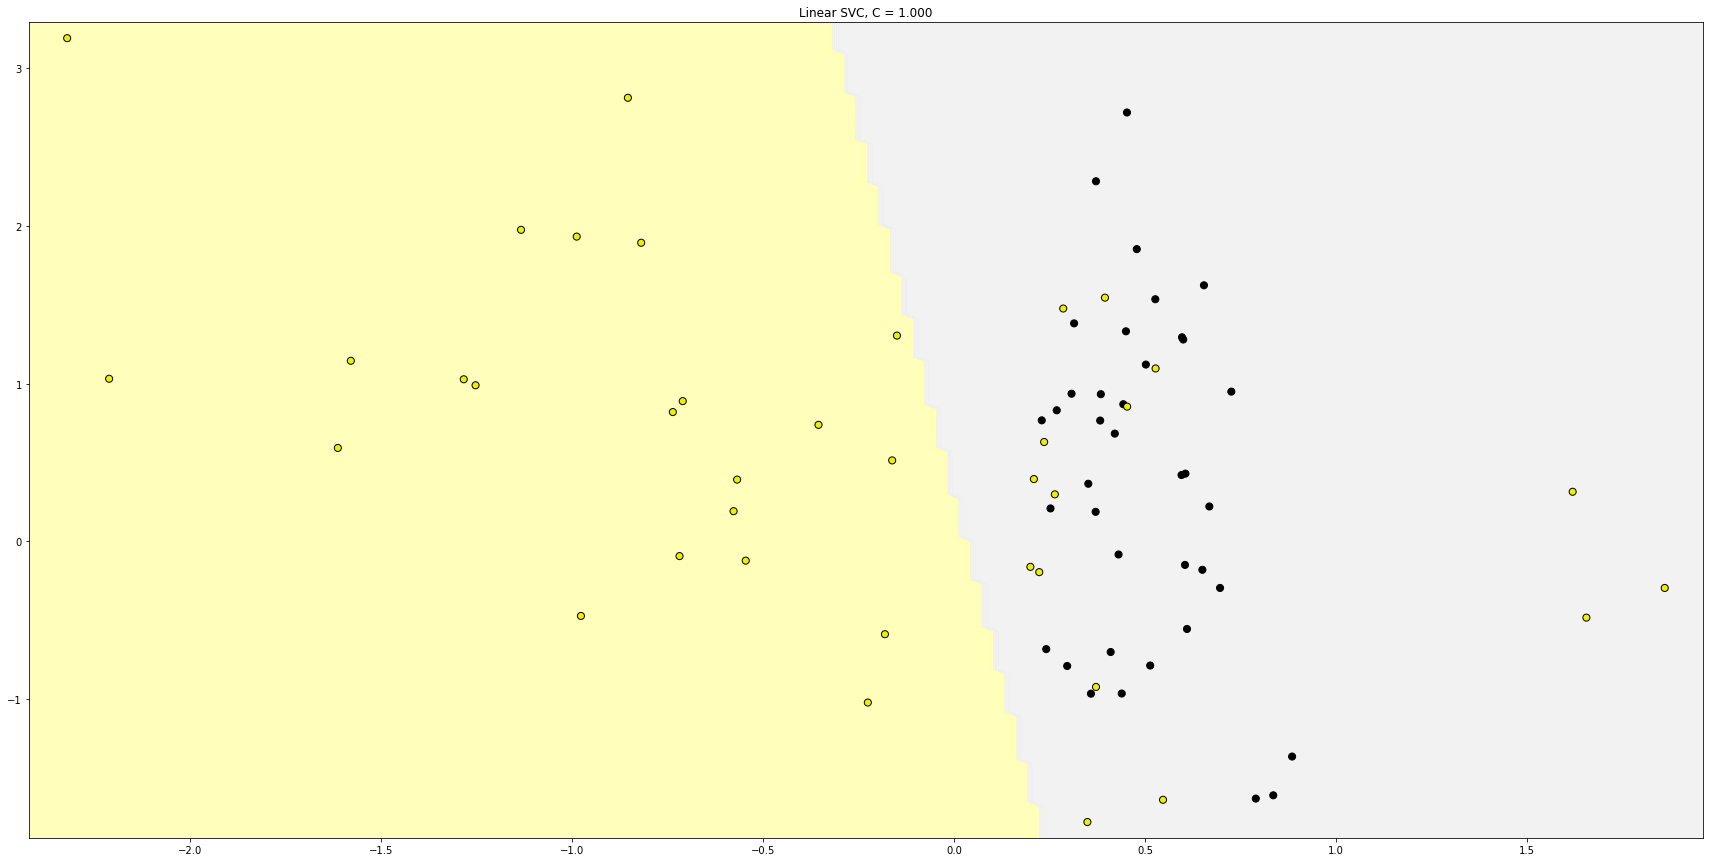

In [33]:
from sklearn.svm import SVC
from plotting_utils import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)

fig, subaxes = plt.subplots(1, 1, figsize=(30, 15))
this_C = 1.0
clf = SVC(kernel = 'linear', C=this_C).fit(X_train, y_train)
title = 'Linear SVC, C = {:.3f}'.format(this_C)
plot_class_regions_for_classifier_subplot(clf, X_train, y_train, None, None, title, subaxes)

#### Linear Support Vector Machine: C parameter

C:\Users\reddy\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


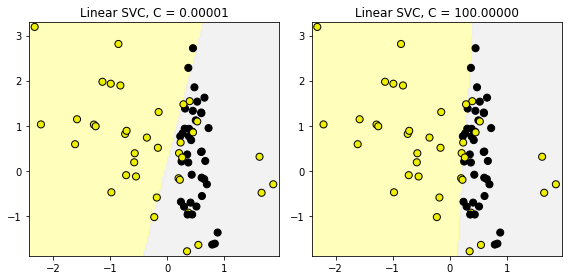

In [29]:
from sklearn.svm import LinearSVC
from plotting_utils import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state = 0)
fig, subaxes = plt.subplots(1, 2, figsize=(8, 4))

for this_C, subplot in zip([0.00001, 100], subaxes):
    clf = LinearSVC(C=this_C).fit(X_train, y_train)
    title = 'Linear SVC, C = {:.5f}'.format(this_C)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
plt.tight_layout()

#### Application to real dataset

In [30]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer

(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = LinearSVC().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of Linear SVC on training set - Known data: {:.3f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Linear SVC on test set - Unknown data: {:.3f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of Linear SVC on training set - Known data: 0.871
Accuracy of Linear SVC on test set - Unknown data: 0.860


C:\Users\reddy\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### Multi-class classification with linear models

#### LinearSVC with M classes generates M one vs rest classifiers.

In [31]:
from sklearn.svm import LinearSVC

fruits = pd.read_table('Data/fruit_data_with_colors.txt')

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.3   0.72]
 [-1.63  1.16]
 [ 0.01  0.43]
 [ 1.25 -1.64]]
Intercepts:
 [-3.29  1.2  -3.04  1.16]


C:\Users\reddy\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


#### Multi-class results on the fruit dataset

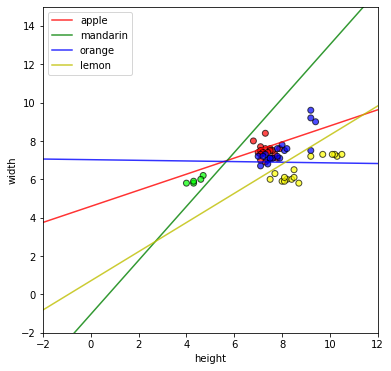

In [32]:
from matplotlib.colors import ListedColormap

target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized Support Vector Machines

### Classification

In [22]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
from plotting_utils import plot_class_regions_for_classifier

X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
#plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
#                                 .fit(X_train, y_train), X_train,
#                                 y_train, None, None,
#                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

<IPython.core.display.Javascript object>

#### Support Vector Machine with RBF kernel: gamma parameter

In [23]:
from plotting_utils import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

<IPython.core.display.Javascript object>

#### Support Vector Machine with RBF kernel: using both C and gamma parameter 

In [24]:
from sklearn.svm import SVC
from plotting_utils import plot_class_regions_for_classifier_subplot

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=100)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma,
                 C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                                 X_test, y_test, title,
                                                 subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
        #fig.savefig('EffectOfGammaAndC.svg', format="svg")

<IPython.core.display.Javascript object>

### Application of SVMs to a real dataset: unnormalized data

In [26]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer,
                                                   random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 0.92
Accuracy of RBF-kernel SVC on test set: 0.94


### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

## Validation curve example

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X = X_fruits_2d.as_matrix()
y = y_fruits_2d.as_matrix()

param_range = np.logspace(-3, 3, 4)
train_scores, test_scores = validation_curve(SVC(), X, y,
                                            param_name='gamma',
                                            param_range=param_range, cv=3)

In [ ]:
print(train_scores)

In [ ]:
print(test_scores)

In [ ]:
plt.figure()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title('Validation Curve with SVM')
plt.xlabel('$\gamma$ (gamma)')
plt.ylabel('Score')
plt.ylim(0.0, 1.1)
lw = 2

plt.semilogx(param_range, train_scores_mean, label='Training score',
            color='darkorange', lw=lw)

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                train_scores_mean + train_scores_std, alpha=0.2,
                color='darkorange', lw=lw)

plt.semilogx(param_range, test_scores_mean, label='Cross-validation score',
            color='navy', lw=lw)

plt.fill_between(param_range, test_scores_mean - test_scores_std,
                test_scores_mean + test_scores_std, alpha=0.2,
                color='navy', lw=lw)

plt.legend(loc='best')
plt.show()